

<h1><center>Trabajo Práctico de simulación 1</center></h1>
<hr width=50%>
<h1><center>Repetidor Analógico vs Repetidor Digital</center></h1>



|          Nombre         | Padrón |    Correo electrónico    |
|:-----------------------:|:------:|:------------------------:|
| Facundo Agustín Demarco | 100620 |    fdemarco@fi.uba.ar    |
|      Leonel Mendoza     | 101153 |    lmendoza@fi.uba.ar    |
|     Francisco Rossi     |  99540 |     frrossi@fi.uba.ar    |




## 0. Resumen:

$\quad$ En el siguiente informe se desarrolla el análisis de dos esquemas de comunicación: en uno se utilizan repetidores digitales y en el otro repetidores analógicos. Con los mismos se quiere transmitir *símbolos* que representan 1 bit. Ambos sistemas poseen $n$ repetidores etapas en cascada y por lo tanto, n-1 repetidores (Ver **Fig. XXX**).

## 1. Introducción:

$\quad$En ambos repetidores si el bit a enviar es $1$, el símbolo asociado es $X_1 = A$; si en cambio se quiere transmitir el bit $0$, el símbolo es $X_1 = −A$, donde $A > 0$. Es decir, la información transmitida se puede modelar como una variable aleatoria discreta de soporte $\{A, −A\}$. Asumiremos que ambos símbolos tienen probabilidad $1/2$.

$\quad$Ambos sistemas de comunicaciones tienen $n$ etapas en cascada, es decir, hay $n − 1$ repetidores. En cada etapa, los símbolos se envían a través de un canal de comunicaciones que puede ser modelado por un factor de atenuación $h$ y por la adición de ruido $W_i$ , $i = 1, \dots , n$. Asumiremos que la distribución de este ruido es gaussiana de media nula y varianza $\sigma^{2}$ para cada canal, es decir, $W_i \sim \mathcal{N}(0, \sigma^2)$, y que los ruidos de distintas etapas son independientes. La diferencia entre ambos repetidores es la manera de procesar el símbolo recibido $Y_i$.


### 1.1 Repetidor digital

$\quad$En el caso del repetidor digital, el bloque con la letra *D* toma una decisión del símbolo. De manera que en cada repetidor la señal de sálida vuelve a valer $X_i = A$ o $X_i = -A$, está decisión la toma de la siguiente manera:\\

$$X_{i+1}=\left\{\begin{array}{l}A \quad si~ Y_i~ \geq~ 0      \\-A \quad si~ Y_i~ <~ 0   \\\end{array}\right.$$

### 1.2 Repetidor analógico

$\quad$En el caso del repetidor analógico, la decisión es única y se toma en el receptor. En las etapas intermedias, los símbolos recibidos son multiplicados por una ganancia para luego retransmitirlos a la siguiente etapa. Los sīmbolos retransmitidos responden a la siguiente ecuación:

$$X_{i+1} = G_{i+1}Y_i,~~~ i = 1, \ldots,n-1$$

### 1.3 Eventos de error



### 1.4 Relación señal a ruido





${\quad \quad \Large\textbf{1. Ganancias de cada etapa}}$

$$SNR = \frac{h^2 \mathbb{E}[X^2_{1}]}{\sigma^2} = \frac{h^2 \mathbb{E}[X^2_{i+1}]}{\sigma^2} = \frac{h^2}{\sigma^2} \mathbb{E}\big[[G_{i+1}(h X_i + W_i)]\big]^2 = \frac{h^2}{\sigma^2} \big[\mathbb{E}[(hX_i)^2]+ \mathbb{E}[2(h \overbrace{Xi Wi}^{\text{Xi e Wi ind.}})] + \mathbb{E}[W^2_i]\big] = \frac{h^2}{\sigma^2} \big[h^2\mathbb{E}[X_i^2]+ \overbrace{2h\mathbb{E}[(Xi)]\underbrace{\mathbb{E}[(Wi)]}_{\text{ $= 0$}}}^{\text{ = 0}} + \mathbb{E}[W^2_i]\big] =  \frac{h^2}{\sigma^2} G^2_{i+1} \mathbb{E}\big[h^2 \xi + \sigma^2 \big] = G^2_{i+1} \frac{1}{\sigma^2} [h^4\xi +\sigma^2] $$

$$SNR = \frac{h^2 \xi}{\sigma^2}$$

$$G_{i+1} = \sqrt{\frac{\xi}{h^2 \xi + \sigma^2}} \quad \quad ó \quad \quad  G_{i+1} = \sqrt{\frac{\xi}{h^2\xi + \sigma^2}} = \sqrt{\frac{\frac{\xi}{\sigma^2}}{\underbrace{\frac{h^2\xi}{\sigma^2}}_{\text{$SNR$}} + 1} } = \sqrt{\frac{1}{h^2}\frac{\overbrace{\frac{h^2\xi}{\sigma^2}}^{\text{$SNR$}}}{SNR + 1}} = \frac{1}{h}\sqrt{\frac{SNR}{SNR + 1}} $$

${\quad \quad \Large\textbf{2.1) Salidas } Y_{n}\textbf{ en función de } W \textbf{, } X_1 \textbf{ y } G}$

Comenzando por la definición de $Y_{i} = h X_i + W_i$, con $X_i = G_i Y_{i-1}$, se desarrolla en forma genérica para un cierto $Y_n$, de forma que para $Y_5$ resulte:

$$ Y_5 = h \left(  G_5(h (G_4(h (G_3(h G_2(h X_1 + W_1) + W_2) + W_3) + W_4) + W_5 \right) $$

Que reescrito en una forma mas útil es:

$$ Y_5 = X_1 h^5 G_2 G_3 G_4 G_5 + \left[  W_1 (G_2 G_3 G_4 G_5) h^4 + W_2 (G_3 G_4 G_5) h^3 + W_3 (G_4 G_5) h^2 + W_4 (G_5) h + W_5 \right]  $$

De una forma genérica se puede expresar:

$$ Y_{i} = X_{1} h^{i} \prod_{k=2}^{i} G_{k} + \underbrace{\sum_{j=1}^{i} \left[ h^{(i-j)} W_{j}  \prod_{k=j+1}^{i} G_{k} \right]}_{\phi_{i}} $$

Las distribucion de los terminos asociados al ruido ($\phi_{i}$) es una normal, con media y varianza tal que:

$$  \phi_{i} \sim \mathcal{N}\left( 0,~ \sum_{j=1}^{i} \left[ \sigma^2 h^{2(i-j)} \prod_{k=j+1}^{i} G_{k}^{2} \right] \right) $$

${\quad \quad \Large\textbf{2.2) Relacion señal ruido de la ultima etapa } \rho_{n}} $

Considerando que en la ultima etapa la señal es:

$$ Y_{n} = \underbrace{X_{1} h^{n} \prod_{k=2}^{n} G_{k}}_{\chi_{n}} + \underbrace{\sum_{j=1}^{n} \left[ h^{(n-j)} W_{j}  \prod_{k=j+1}^{n} G_{k} \right]}_{\phi_{n}} $$

Se aisla la parte de señal útil y la parte de ruido, dividiendose la auto-correlación de cada una para obtener la SNR$_{n}$

$$ \text{SNR}_{n} = \frac{\mathbb{E}[\chi_{n}^{2}]}{\mathbb{E}[\phi_{n}^{2}]} = \frac{\xi h^{2n} \prod_{k=2}^{n} G_{k}^{2}}{\sum_{j=1}^{n} \left[ \sigma^2 h^{2(n-j)} \prod_{k=j+1}^{n} G_{k}^{2} \right]} = \overbrace{\frac{\xi h^2}{\sigma^2}}^{\text{SNR}_1} \frac{ h^{2n-2} \prod_{k=2}^{n} G_{k}^{2}}{\sum_{j=1}^{n} \left[ h^{2(n-j)} \prod_{k=j+1}^{n} G_{k}^{2} \right]} $$

$$ \frac{\xi h^2}{\sigma^2} \frac{h^{2n-2} G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}}{h^{2(n-1)} G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2} + h^{2(n-2)} G_{3}^{2} G_{4}^{2} \cdots G_{n}^{2} + \cdots} = \frac{\xi h^2}{\sigma^2} \frac{h^{2(n-1)}}{h^{2(n-1)} \frac{G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}}{G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}} + h^{2(n-2)} \frac{G_{3}^{2} G_{4}^{2} \cdots G_{n}^{2}}{G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}} + \cdots} = \frac{\xi h^2}{\sigma^2} \frac{h^{2(n-1)}}{h^{2(n-1)} + \frac{h^{2(n-2)}}{G_{2}^{2}} + \frac{h^{2(n-3)}}{G_{2}^{2} G_{3}^{2}} + \cdots}$$

$$ = \frac{\xi h^2}{\sigma^2} \frac{1}{\frac{h^{2(n-1)}}{h^{2(n-1)}} +  \frac{h^{2(n-2)}}{h^{2(n-1)}}G_{2}^{-2} + \frac{h^{2(n-3)}}{h^{2(n-1)}}G_{2}^{-2} G_{3}^{-2} + \cdots} = \frac{\xi h^2}{\sigma^2} \frac{1}{1 +  h^{-2(1)}G_{2}^{-2} + h^{-2(2)}G_{2}^{-2} G_{3}^{-2} + \cdots}  = $$


$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} \prod_{k=2}^{j} G_{k}^{-2} \right]} $$

Usando el resultado $\text{G}_{k} = \frac{1}{h}\sqrt{\frac{SNR_1}{SNR_1 + 1}}$:

$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} \prod_{k=2}^{j} h^{2}\frac{SNR_1 + 1}{SNR_1} \right]} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} \left( h^{2}\frac{SNR_1 + 1}{SNR_1} \right)^{j-1} \right]} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} h^{2(j-1)} \left( \frac{SNR_1 + 1}{SNR_1} \right)^{j-1} \right]} $$

Luego, con $k = j - 1$

$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\sum_{k=0}^{n-1} \left( \frac{SNR_1 + 1}{SNR_1} \right)^{k}} $$

Que mediante la identidad, $\sum_{k=0}^{n-1} \alpha^{k} = \frac{\alpha^{n}-1}{\alpha - 1}$, se obtiene:

$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\frac{\left( \frac{SNR_1 + 1}{SNR_1} \right)^{n}-1}{\frac{SNR_1 + 1}{SNR_1} - 1}} = \frac{\text{SNR}_{1}(\frac{SNR_1 + 1}{SNR_1} - 1)}{\left( \frac{SNR_1 + 1}{SNR_1} \right)^{n}-1} = \frac{\overbrace{\text{SNR}_{1}(\frac{SNR_1 + 1 - SNR_1}{SNR_1})}^{= 1}}{\underbrace{\frac{\left(SNR_1 + 1\right)^{n}}{SNR_{1}^{n}}-1}_{\frac{\left(SNR_1 + 1\right)^{n}}{SNR_{1}^{n}}-\frac{SNR_{1}^{n}}{SNR_{1}^{n}}}} = \frac{1}{\frac{\left(SNR_1 + 1\right)^{n} - SNR_{1}^{n}}{SNR_{1}^{n}}}=\frac{SNR_{1}^{n}}{(SNR_{1}+1)^{n} - SNR_{1}^{n}}$$

Finalmente:

$$ \text{SNR}_{n} = \frac{1}{(1+SNR_{1}^{-1})^{n}-1} $$

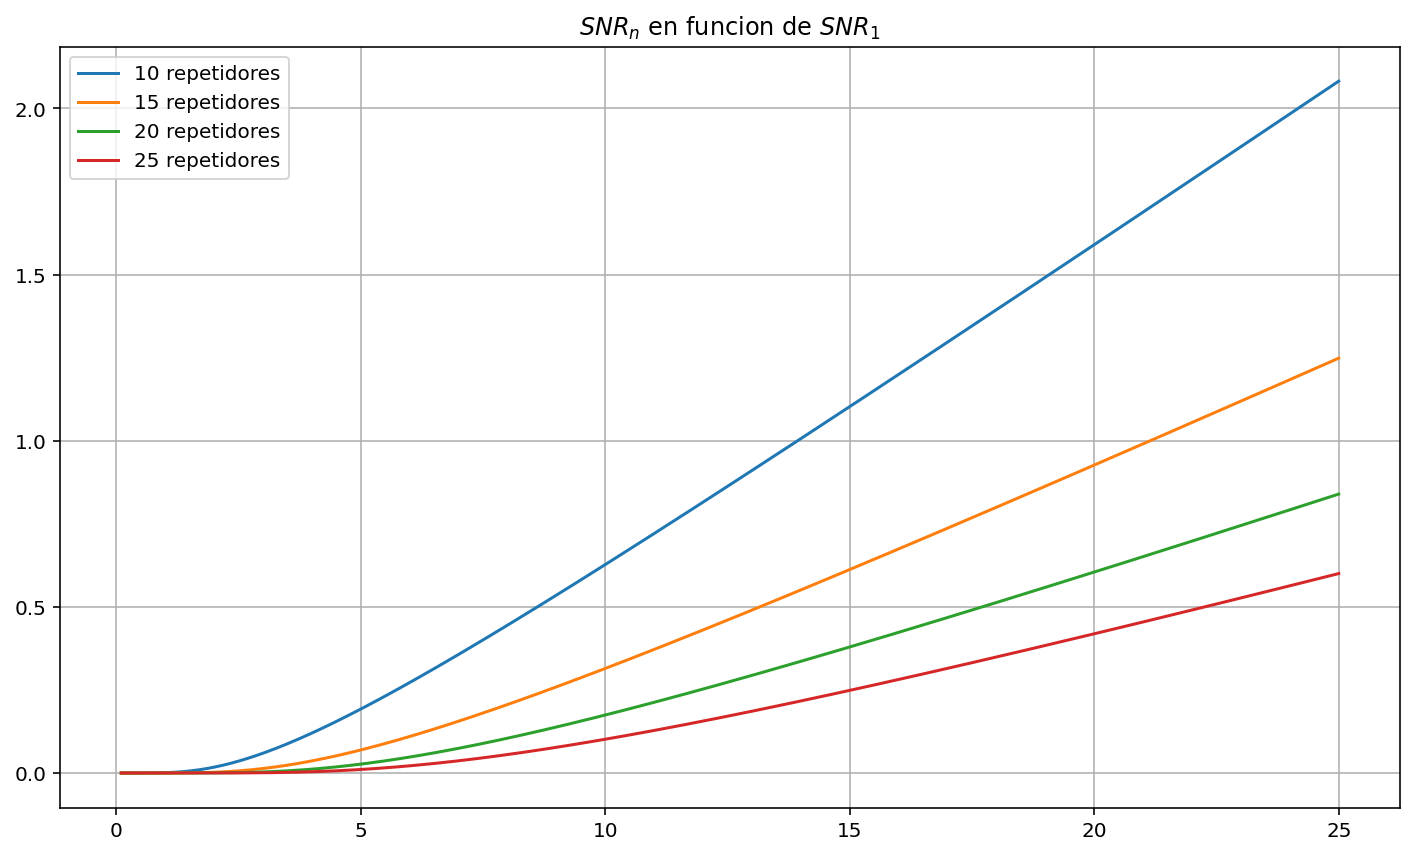

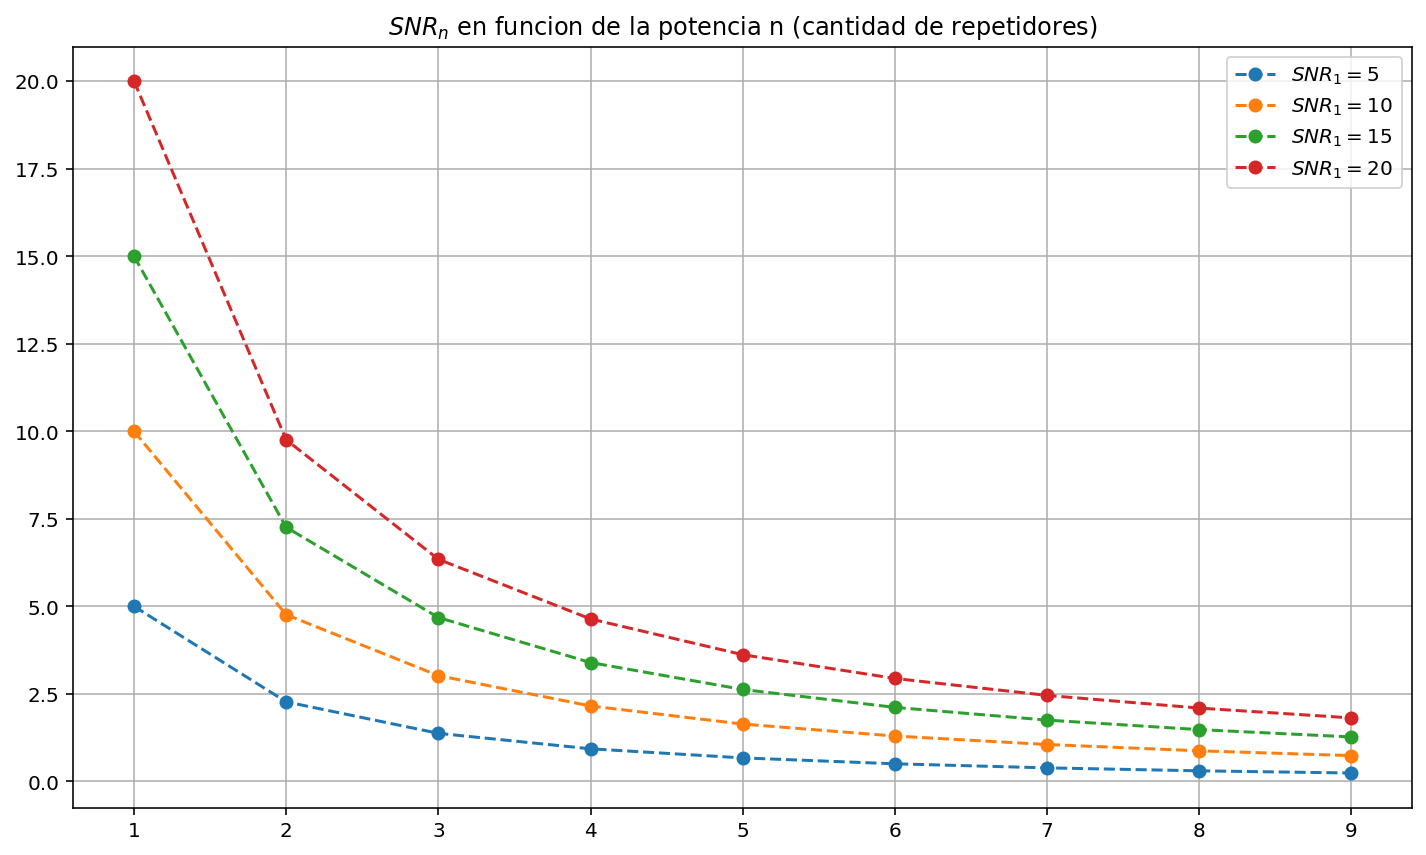

In [50]:
import matplotlib.pyplot as plt
import numpy as np

step_SNR = 1/1000
cant_repe = 10

n_const = [10, 15, 20, 25]   # cantidad fija de repetidores
SNR_const = [5, 10, 15, 20]  # cantidad fija de SNR_1

SNR_1 = np.arange(0.1,25,step_SNR)
n = np.arange(1,cant_repe,1)

SNR_n_SNR_1 = 1/((1+(1/SNR_1))**(n_const[1])-1)  # particularmente para las constantes 1
SNR_n_n = 1/((1+(1/SNR_const[1]))**(n)-1)

vector_legend = []

plt.figure()
for i in n_const:
    plt.plot(SNR_1, 1/((1+(1/SNR_1))**(i)-1))
    vector_legend.append('%d repetidores'%i)

plt.legend(vector_legend)
plt.title(r'$SNR_{n}$ en funcion de $SNR_{1}$')
plt.grid('minor')

vector_legend = []

plt.figure()
for i in SNR_const:
    plt.plot(n, 1/((1+(1/i))**(n)-1), 'o--')
    vector_legend.append(r'$SNR_1 = %d$ '%i)

plt.legend(vector_legend)

plt.title(r'$SNR_{n}$ en funcion de la potencia n (cantidad de repetidores)')
plt.grid('minor')

${\quad \quad \Large\textbf{2.3) Probabilidad de error promedio en función de SNR de la última etapa } \rho_{n}} $


La probabildad de error se puede calcular de la siguiente manera usando probabilidades totales y teniendo en cuenta que el receptor determina el valor de $\hat{X}_1$ como:


$$
\hat{X}_{1} = \left\{\begin{array}{ll}
         A & \textrm{si } Y_{n} \geq 0\\
        -A & \textrm{si } Y_{n} < 0
      \end{array}\right.
$$

Por lo tanto calculamos la probabilidad de error utilizando la formula de probabilidades totales como:

$$
\begin{aligned}
\mathbb{P}_{e} &= \mathbb{P}\left[\hat{X}_{1} \neq X_{1}\right]\\ 
&= \mathbb{P}\left[\hat{X}_{1} \neq X{1} |{X_{1} = A}\right]\mathbb{P}\left[X_{1} = A\right] + \mathbb{P}\left[\hat{X}_{1} \neq X_{1} |{X_{1} = -A}\right] \mathbb{P}\left[X_{1} = -A\right]\\
&= \mathbb{P}\left[\hat{X}_{1} = -A |{X_{1} = A}\right] \mathbb{P}\left[X_{1} = A\right] + \mathbb{P}\left[\hat{X}_{1} = A |{X_{1} = -A}\right] \mathbb{P}\left[X_{1} = -A\right]\\
&= \mathbb{P}\left[Y_{n} < 0 |{X_{1} = A}\right] \mathbb{P}\left[X_{1} = A\right] + \mathbb{P}\left[Y_{n} \geq 0 |{X_{1} = -A}\right] \mathbb{P}\left[X_{1} = -A\right]
\end{aligned}
$$

Anteriormente se obtuvo que:

$$ Y_{n} = \underbrace{X_{1} h^{n} \prod_{k=2}^{n} G_{k}}_{\chi_{n}} + \underbrace{\sum_{j=1}^{n} \left[ h^{(n-j)} W_{j+1}  \prod_{k=j+1}^{n} G_{k} \right]}_{\phi_{n}} $$

$$  \phi_{n} \sim \mathcal{N}\left( 0,~ \sum_{j=1}^{n} \left[ \sigma^2 h^{2(n-j)} \prod_{k=j+1}^{n} G_{k}^{2} \right] \right), \quad\quad \text{si }G_k = \frac{1}{h}\sqrt{\frac{SNR}{SNR + 1}} $$


$$\phi_{n} \sim \mathcal{N}(0,\overbrace{ \sigma^2 [1+SNR_1] \Bigg[1-\bigg[\frac{SNR_1}{1+SNR_1}\bigg]^n\Bigg]}^{\text{ver Apéndice 1}}) $$



Entonces $${Y_{n}|}_{X_1 = \pm A} \sim \mathcal{N}(\pm A h^{n} \prod_{k=2}^{n} G_{k},\sigma^2 [1+SNR_1] \Bigg[1-\bigg[\frac{SNR_1}{1+SNR_1}\bigg]^n\Bigg])$$

Además se obtuvo que:


$$
h^{n} \prod_{k=2}^{n} G_{k} = h \bigg[\frac{SNR_1}{1+SNR_1}\bigg]^{\frac{n-1}{2}} \text{ver Apéndice 1}
$$

Luego $${Y_{n}|}_{X_1 = \pm A} \sim \mathcal{N}(\pm A h \bigg[\frac{SNR_1}{1+SNR_1}\bigg]^{\frac{n-1}{2}},\sigma^2 [1+SNR_1] \Bigg[1-\bigg[\frac{SNR_1}{1+SNR_1}\bigg]^n\Bigg])$$

Finalmente $$SNR_1 = \frac{1}{\big[1+\frac{1}{SNR_n}\big]^{\frac{1}{n}}-1}$$
 $${Y_{n}|}_{X_1 = \pm A} \sim \mathcal{N}(\pm A h \bigg[\frac{1}{\bigg(1+\frac{1}{SNR_n}\bigg)^{\frac{1}{n}}}\bigg]^{\frac{n-1}{2}},\sigma^2 \Bigg[\frac{\big(1+\frac{1}{SNR_n}\big)^{\frac{1}{n}}}{\big(1+\frac{1}{SNR_n}\big)^{\frac{1}{n}}-1}\Bigg] \Bigg[1-\frac{1}{1+\frac{1}{SNR_n}}\Bigg])$$

Transformamos la función de supervivencia a la función de distribución.
$$
\mathbb{P}\left[Y_{n} \geq 0 |_{X_{1} = -A}\right]\ = 1-\mathbb{P}\left[Y_{n} < 0 |_{X_{1} = -A}\right]
$$

Normalizamos la función de distribución sabiendo que $\mathbb{P}\left[X_{1} = A\right] = \mathbb{P}\left[X_{1} = -A\right] = \frac{1}{2}$
$$
   \mathbb{P}_{e} = \frac{1}{2}\,\Phi\left(-\frac{\mu_{{Y_{n}|}_{X_1 = A}}}{\sigma_{{{Y_{n}|}_{X_1 = A}}}}\right) + \frac{1}{2}\left(1-\Phi\left(-\frac{\mu_{{Y_{n}|}_{X_1 = -A}}}{\sigma_{{Y_{n}|}_{X_1 = -A}}}\right)\right)
$$

Ademas podemos decir que en el segundo termino $-\mu_{{Y_{n}|}_{X_1 = -A}}=\mu_{{Y_{n}|}_{X_1 = A}} \text{ y } \sigma_{{Y_{n}|}_{X_1 = -A}}=\sigma_{{Y_{n}|}_{X_1 = A}}$ ya que no depende de que si $X_{1}=A \text{ o } X_{1}=-A$ y que el primer término por simetría de la función de distribución de la normal estandar.

$$
    \mathbb{P}_{e} = \frac{1}{2}\,\left(1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = A}}}{\sigma_{{{Y_{n}|}_{X_1 = A}}}}\right)\right) + \frac{1}{2}\left(1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = A}}}{\sigma_{{Y_{n}|}_{X_1 = -A}}}\right)\right)
    =1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = -A}}}{\sigma_{{{Y_{n}|}_{X_1 = -A}}}}\right)
$$

$$\text{Sabiendo que}\quad \mu_{{Y_{n}|}_{X_1 = -A}} = A h^{n} \prod_{k=2}^{n} G_{k},\quad\quad\quad \text{y que}, \quad \text{SNR}_n = \frac{\mathbb{E}[\chi_{n}^{2}]}{\mathbb{E}[\Phi_{n}^{2}]} = \frac{\xi h^{2n} \prod_{k=2}^{n} G_{k}^{2}}{\sigma^{2}_{{Y_{n}|}_{X_1 = A}}} \implies \sigma_{{Y_{n}|}_{X_1 = A}} = \frac{\sqrt{\xi} h^{n} \prod_{k=2}^{n} G_{k}}{\sqrt{\text{SNR}_n}}$$

Entonces la probabilidad de error es:

$$ \mathbb{P}_{e} = 1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = -A}}}{\sigma_{{{Y_{n}|}_{X_1 = -A}}}}\right) = 1 - \Phi\left( \frac{A h^{n} \prod_{k=2}^{n} G_{k}}{\frac{\sqrt{\xi} h^{n} \prod_{k=2}^{n} G_{k}}{\sqrt{\text{SNR}_n}}}\right) \overbrace{=}^{A = \sqrt{\xi}} 1-\Phi\left(\sqrt{\text{SNR}_n}\right)$$

[0.4358178914637945, 0.4781765232061604, 0.4924576557989749, 0.4975039836718865, 0.4991391234380618, 0.4997186712413261]


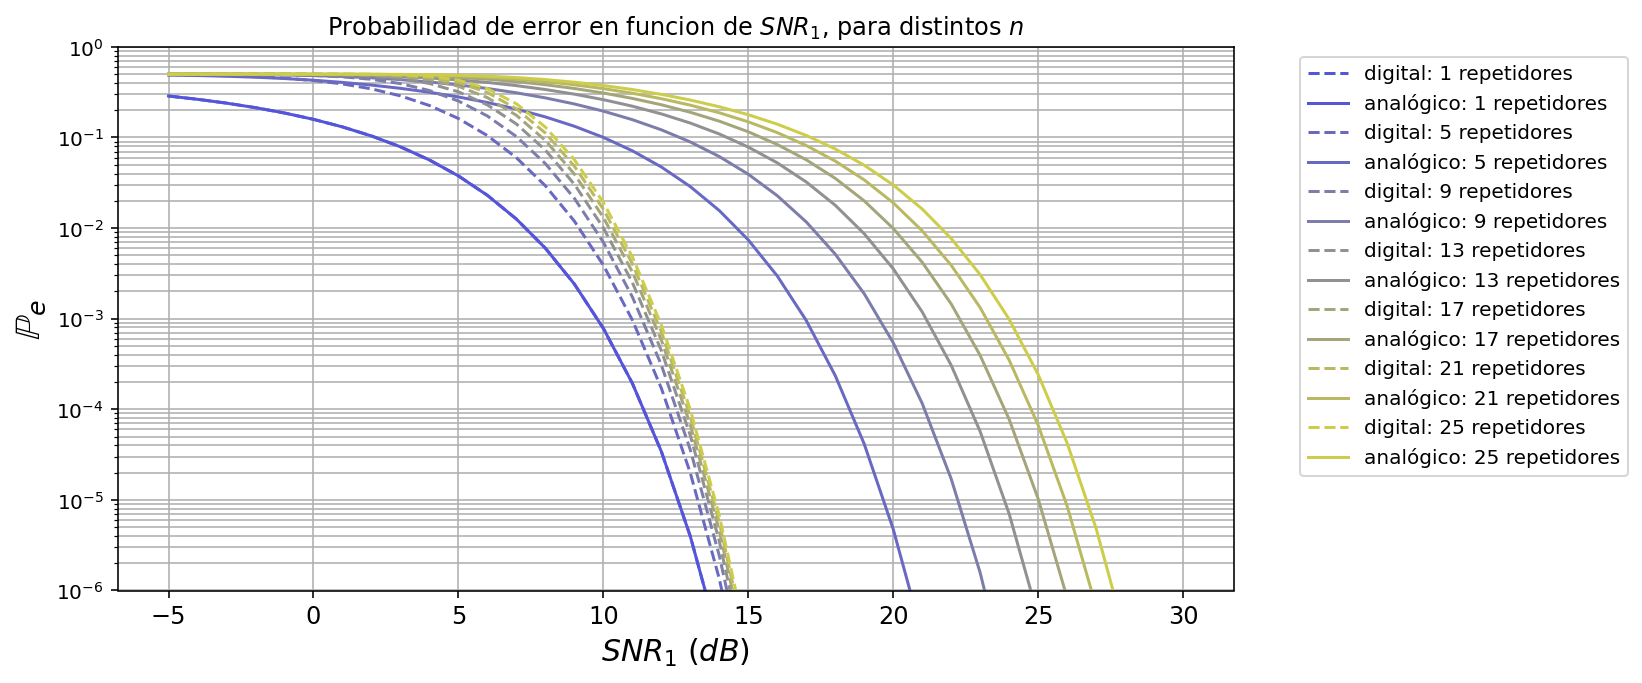

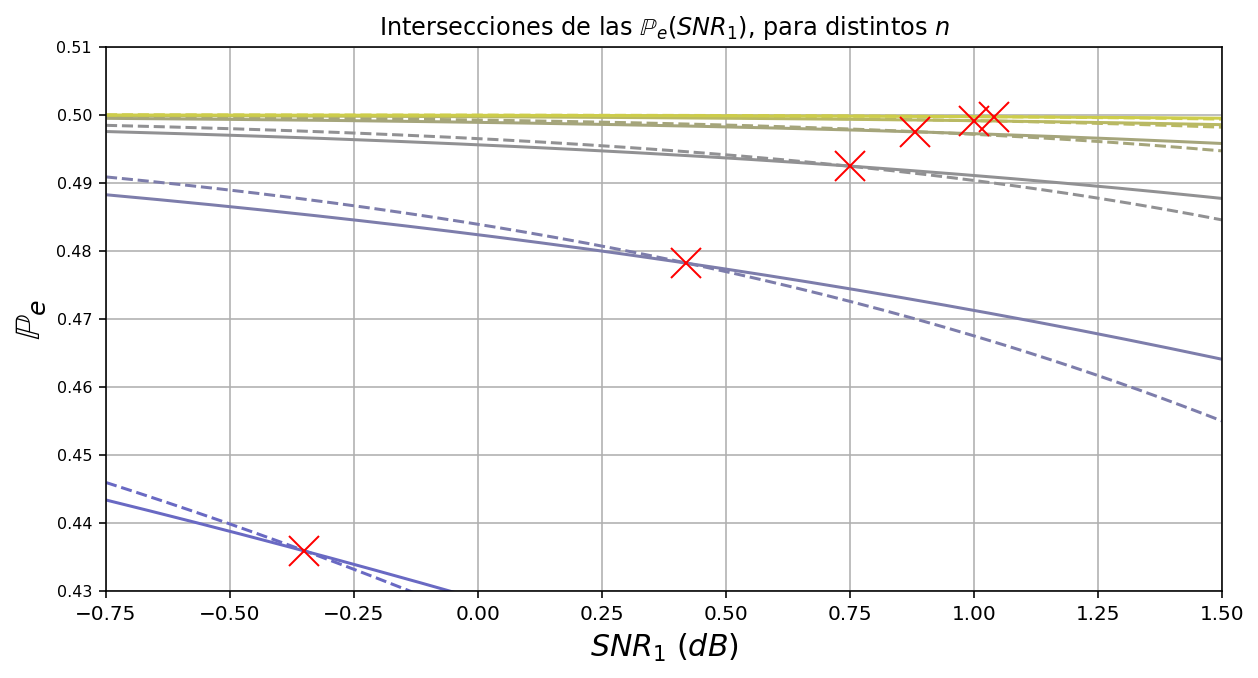

In [51]:
import scipy as sc
import matplotlib
from scipy import stats
from matplotlib import scale

qfunc = lambda x : sc.stats.norm.sf(x) # defino la función qfunc

P_e_d = lambda n, SNR_lin: 1/2 * (1-(1-2*qfunc(np.sqrt(SNR_lin)))**n) # Probabilidad de error (digital)
P_e = lambda n,SNR_lin: qfunc(np.sqrt(1 / ( (1+(1/SNR_lin))**n - 1))) # Probabilidad de error (analogico)
Resta = lambda n, SNR_lin:1/2 * (1-(1-2*qfunc(np.sqrt(SNR_lin)))**n) - qfunc(np.sqrt(1 / ( (1+(1/SNR_lin))**n - 1)))
SNR = np.arange(-5,30 + 1)
SNR_lin = 10 ** (SNR/10)

vector_legend = []

fig1=plt.figure(figsize=(10,5))

for n in range(1,25+4,4):
    plt.semilogy(SNR,P_e_d(n,SNR_lin), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255), linestyle='--')
    vector_legend.append('digital: %d repetidores'%n)
    plt.semilogy(SNR,P_e(n,SNR_lin), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255))
    vector_legend.append('analógico: %d repetidores'%n)

plt.ylim(10e-7,1)
plt.grid(True, which="both", ls="-")
plt.title(r'Probabilidad de error en funcion de $SNR_1$, para distintos $n$', fontsize=12)
plt.xlabel(r'$SNR_1~(dB)$', fontsize=15)
plt.ylabel(r'$\mathbb{P}_{e}$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend(vector_legend, bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 10})

#fig,ax2=plt.subplots()
#left, bottom, width, height = [0.16, 0.165, 0.4, 0.4]
#ax2 = fig1.add_axes([left, bottom, width, height])

SNR_zoom_dB = np.linspace(-0.75, 1.5, 150)
SNR_zoom = 10 ** (SNR_zoom_dB/10)

plt.figure(figsize=(10,5))
for n in range(1,25+4,4):
    plt.plot(SNR_zoom_dB,P_e_d(n,SNR_zoom), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255), linestyle= '--')
    plt.plot(SNR_zoom_dB,P_e(n,SNR_zoom), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255))

x_intersection=[-0.35,0.42,0.75,0.88,1,1.04]
y_intersection=[P_e(5,10 ** (-0.35/10)), P_e(9,10**(0.42/10)), P_e(13,10 ** (0.75/10)), P_e(17, 10 ** (0.88/10)), P_e(21, 10 ** (1/10)), P_e(25, 10 ** (1.04/10))]
plt.plot(x_intersection, y_intersection, 'xr', markersize=15)
plt.grid(True, which="both", ls="-")
plt.ylim(0.43,0.51)
plt.xlim(-0.75,1.5)
plt.title(r'Intersecciones de las $\mathbb{P}_{e}(SNR_1)$, para distintos $n$')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.xlabel(r'$SNR_1~(dB)$',fontsize=15)
plt.ylabel(r'$\mathbb{P}_{e}$',fontsize=18);

print(y_intersection)



In [52]:
###  EJERCICIO 4


N = int(1e5) #cantidad de realizaciones
media_ruido = 0
var_ruido = 1
n = 9 # cantidad de repetidores

proba = 0.5 # probabilidad de la bernoulli
SNR1_dB = np.arange(5,25+1,1)
SNR1 = 10 ** (SNR1_dB/10)
h = 0.9 # factor de atenuación
G = (1/h) * np.sqrt(SNR1/(SNR1+1))
A = np.sqrt((var_ruido**2/h**2) *SNR1)

#generación de variables
X=np.zeros((len(SNR1), N))

#print('largo:',len(SNR1_dB))

for i in range(len(SNR1)):
    X[i] = np.array([(np.random.binomial(size=N, n=1, p=proba) - 0.5) * 2 * A[i]])

def repetidor_analogico(entrada, ganancia,A):
    return entrada * ganancia

def repetidor_digital(entrada, ganancia, A):
    salida = np.zeros(len(entrada))
    for i in range(len(entrada)):
        if entrada[i] < 0:
            salida[i] = -A
        else:
            salida[i] = A

    return salida

def ruido(entrada, media_ruido, var_ruido, N):
    #genero el ruido cada vez que llamo la funcion
    aux = entrada + np.random.normal(loc=media_ruido, scale=var_ruido, size=N)
    return aux

def atenuacion(entrada,h):
    return entrada * h

repe_dicc = {
    'repetidor_analogico': repetidor_analogico,
    'repetidor_digital': repetidor_digital
}

def sistema(entrada,n,media_ruido,var_ruido,N,h, ganancia,tipo,A):
    salida = entrada
    for i in range(n):
        salida = repe_dicc["repetidor_%s"%tipo](ruido(atenuacion(salida, h), media_ruido, var_ruido, N) , ganancia, A)

    salida_pre_receptor = salida
    salida = repetidor_digital(salida,ganancia,A) # receptor
    return salida, salida_pre_receptor


def mean_montecarlo(entrada, salida):
    N_mean = 0
    if len(entrada) != len(salida):
        return 'size_exc'

    N = len(entrada)
    for i in range(N):
        if entrada[i] != salida[i]:
             N_mean += 1
    return N_mean/N


P_e_mc_snr = np.zeros(len(SNR1))
P_e_d_mc_snr = np.zeros(len(SNR1))
for i in range(len(SNR1)):
    #print('SNR nro ',i)
    salida_analog, salida_analog_pre_receptor = sistema(X[i], n, media_ruido, var_ruido, N, h, G[i], 'analogico',A[i])
    salida_digit, salida_digit_pre_receptor = sistema(X[i], n, media_ruido, var_ruido, N, h, G[i], 'digital', A[i])
    P_e_mc_snr[i] = mean_montecarlo(X[i], salida_analog)
    P_e_d_mc_snr[i] = mean_montecarlo(X[i], salida_digit)
    #print('entrada: ',X[i])
    #print('salida: ',salida_analog)

print('done')

done


[3.8237e-01 3.4758e-01 3.1146e-01 2.7373e-01 2.3606e-01 1.9686e-01
 1.5625e-01 1.2112e-01 8.9830e-02 6.1330e-02 3.9030e-02 2.3810e-02
 1.1890e-02 4.9900e-03 1.6600e-03 4.1000e-04 1.1000e-04 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]
[2.5255e-01 1.7423e-01 1.0291e-01 5.1680e-02 2.1200e-02 7.0700e-03
 1.7100e-03 2.3000e-04 7.0000e-05 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]


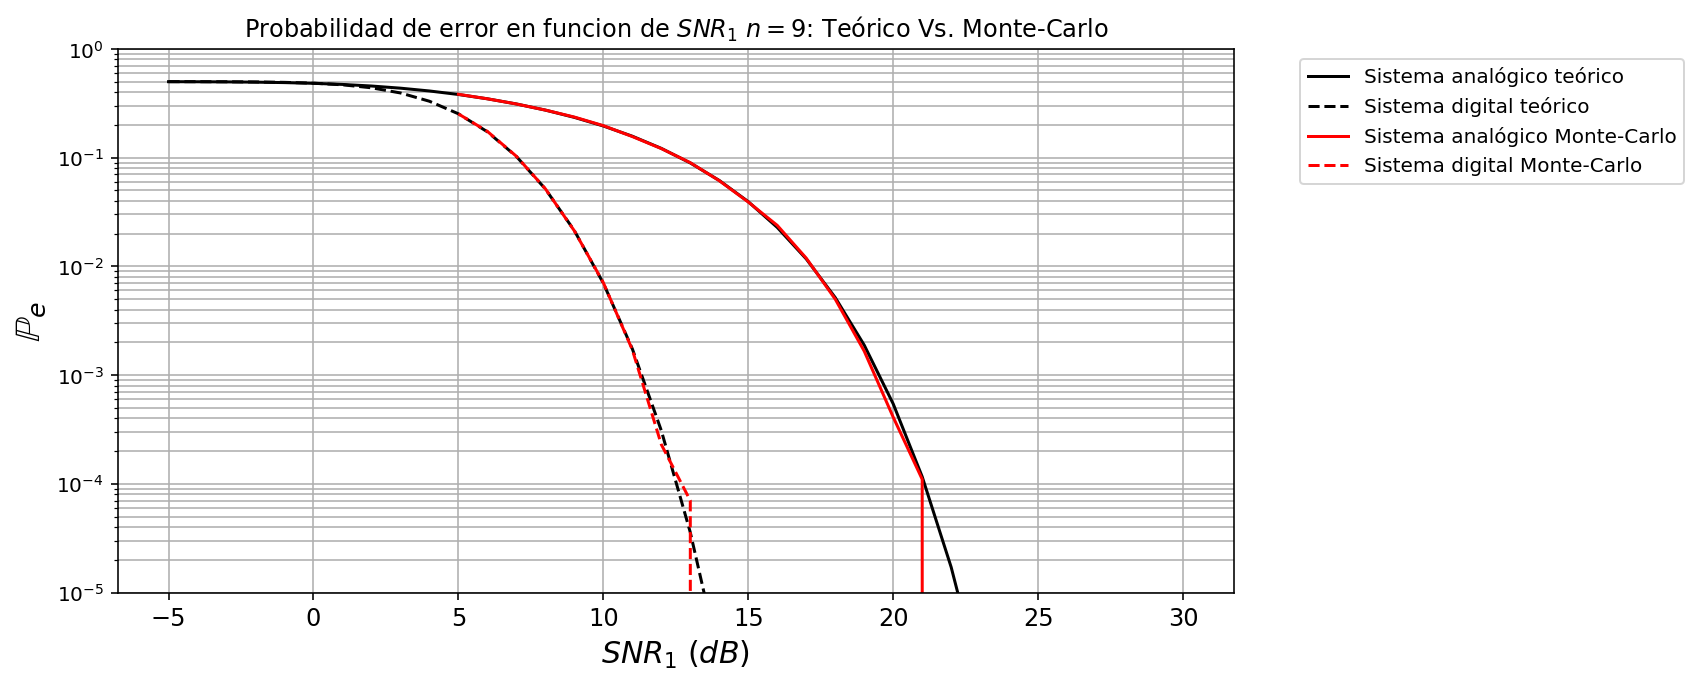

In [53]:
plt.figure(figsize=(10,5))

plt.semilogy(SNR,P_e(9,SNR_lin), color='k')
plt.semilogy(SNR,P_e_d(9,SNR_lin), color='k', linestyle= '--')

plt.semilogy(SNR1_dB, P_e_mc_snr, color='r')
plt.semilogy(SNR1_dB, P_e_d_mc_snr, color='r', linestyle='--')

plt.legend(["Sistema analógico teórico", "Sistema digital teórico", "Sistema analógico Monte-Carlo", "Sistema digital Monte-Carlo"],bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 10})

plt.ylim(10e-6,1)
plt.grid(True, which="both", ls="-")
plt.title(r'Probabilidad de error en funcion de $SNR_1$ $n = 9$: Teórico Vs. Monte-Carlo', fontsize=12)
plt.xlabel(r'$SNR_1~(dB)$', fontsize=15)
plt.ylabel(r'$\mathbb{P}_{e}$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10);

print(P_e_mc_snr)
print(P_e_d_mc_snr)


In [60]:
# cálculo el error cuadrático medio entre ambas curvas:
SNR_rango = np.arange(5,25+1,1)

ecm_analog = (np.square(P_e_mc_snr - P_e(9,SNR_rango))).mean()
ecm_digit  = (np.square(P_e_d_mc_snr - P_e_d(9,SNR_rango))).mean()
print("El error cuadrático medio en el caso analógico entre la curva teórica y la simulación MC es %.8f" %ecm_analog)
print("El error cuadrático medio en el caso digital entre la curva teórica y la simulación MC es %.8f" %ecm_digit)


El error cuadrático medio en el caso analógico entre la curva teórica y la simulación MC es 0.00510335
El error cuadrático medio en el caso digital entre la curva teórica y la simulación MC es 0.00194213


In [54]:
### EJERCICIO 4.3

h = 0.9
var_ruido = 1
subindice = 8
A_nuevo = A[subindice]
SNRh = SNR1[subindice]
X_hist = X[subindice]
G_hist = (1/h)*np.sqrt(SNRh/(SNRh+1))
n_h = 9

# valores media y desvio estandar teoricos
mu = A_nuevo*h*np.power(SNRh/(1+SNRh),(n_h-1)/2)
sigma = np.sqrt(var_ruido**2 * (1+SNRh)*(1-np.power(SNRh/(1+SNRh),n_h)))

# defino el eje para las densidades y las funciones densidad
samples = int(1e3)
y = np.linspace(-15,15, samples)
f_Y_A = sc.stats.norm.pdf(y, loc=mu, scale=sigma)
f_Y_m_A= sc.stats.norm.pdf(y, loc=(-mu), scale=sigma)

# paso un vector X por el sistema para hacer el histograma
salida_analog, salida_analog_pre_receptor = sistema(X_hist, n_h, media_ruido, var_ruido, N, h, G_hist, 'analogico',A_nuevo)
salida_analog_pre_receptor = ruido(atenuacion(salida_analog_pre_receptor, h), media_ruido, var_ruido, N)

# intercepto los dos simbolos y los separo
salida_apr_A = []
salida_apr_m_A = []

for i in range(len(salida_analog_pre_receptor)):
    if X_hist[i] < 0:
        salida_apr_m_A.append(salida_analog_pre_receptor[i])
    elif X_hist[i] > 0:
        salida_apr_A.append(salida_analog_pre_receptor[i])

salida_analog_pre_receptor_A = np.array(salida_apr_A)
salida_analo_pre_receptor_m_A = np.array(salida_apr_m_A)


# defino el eje y la interseccion para "colorear" eventos de error
y_eve = np.arange(-15,15,0.1)
f_Y_A_eve = sc.stats.norm.pdf(y_eve, loc=mu, scale=sigma)
f_Y_m_A_eve= sc.stats.norm.pdf(y_eve, loc=(-mu), scale=sigma)

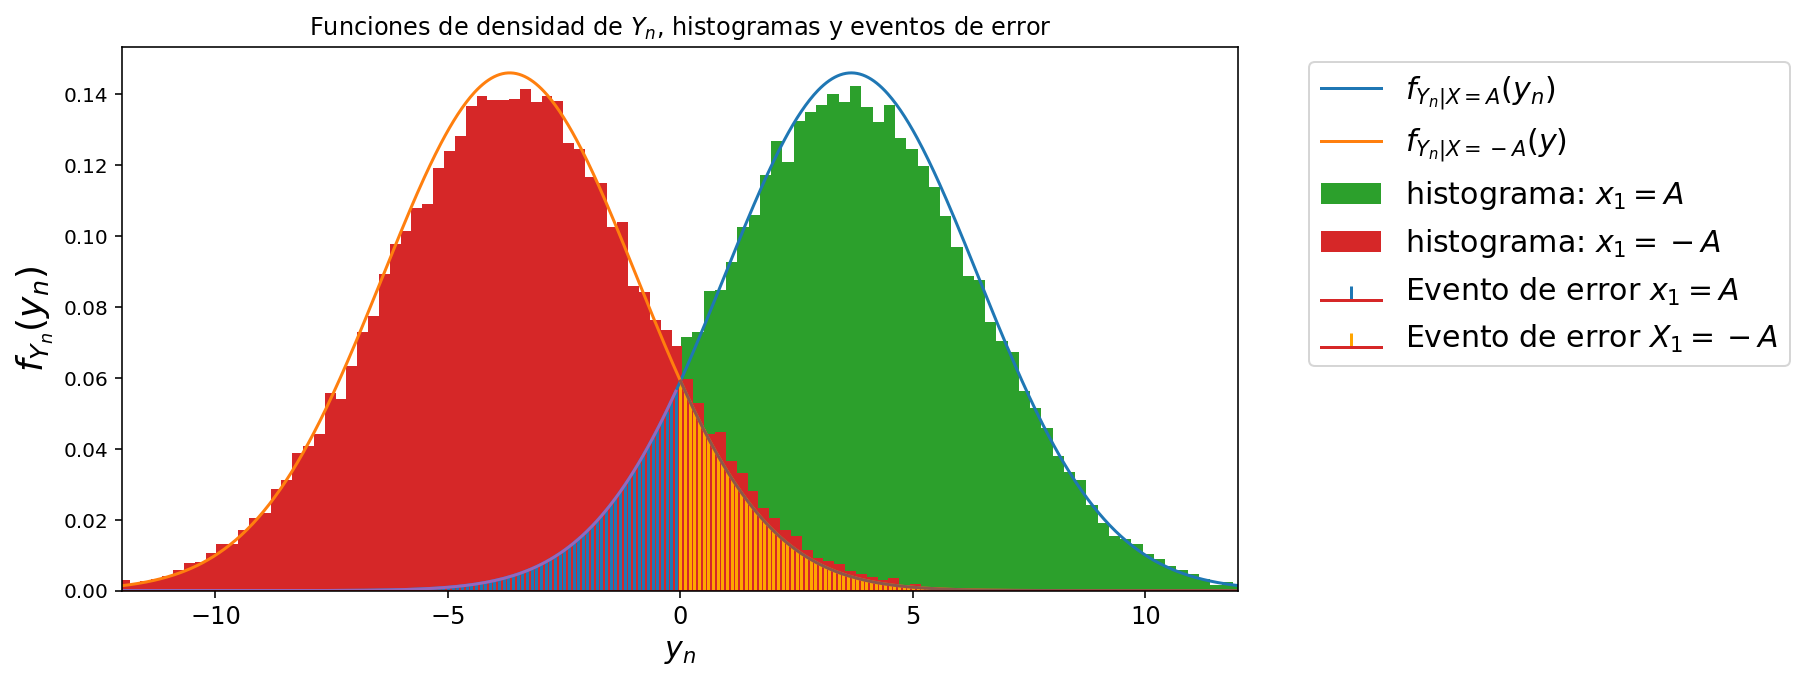

In [55]:
plt.figure(figsize=(10,5))

plt.plot(y,f_Y_A)
plt.plot(y,f_Y_m_A)

n, binsA, patches = plt.hist(salida_analog_pre_receptor_A,100,density="True")
nm, binsmA, patchesm = plt.hist(salida_analo_pre_receptor_m_A,100,density="True")

plt.stem(y_eve[0:150],f_Y_A_eve[0:150], markerfmt="", use_line_collection=True)
plt.stem(y_eve[150:299], f_Y_m_A_eve[150:299], 'orange', markerfmt="", use_line_collection=True)

plt.title(r'Funciones de densidad de $Y_n$, histogramas y eventos de error', fontsize=12)
plt.xlabel(r'$y_n$', fontsize=15)
plt.ylabel(r'$f_{Y_n}(y_n)$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend([r"$f_{Y_n|X=A}(y_n)$",r"$f_{Y_n|X=-A}(y)$",r"histograma: $x_1 = A$",r"histograma: $x_1 = -A$",r"Evento de error $x_1 = A$", r"Evento de error $X_1 = -A$"], bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 15})
plt.xlim(-12,12)

plt.show()

In [56]:
mu_A = np.mean(salida_apr_A)
mu_m_A = np.mean(salida_apr_m_A)

sigma_A = np.sqrt(np.var(salida_apr_A))
sigma_m_A = np.sqrt(np.var(salida_apr_m_A))

print('    VALORES:')
print('media teorica: ', mu)
print('varianza teorica: ', sigma**2)
print('media hist A: ', mu_A)
print('varianza hist A: ', sigma_A**2)
print('media hist -A: ', mu_m_A)
print('varianza hist -A: ', sigma_m_A**2)

print('    DIFERENCIAS:')
print('Diferencia con mu muesral A ',np.abs(mu - mu_A))
print('Diferencia con mu muestral -A ',np.abs(-mu - mu_m_A))
print('Diferencia con sigma muesral A ',np.abs(sigma - sigma_A))
print('Diferencia con sigma muestral -A ',np.abs(sigma - sigma_m_A))
print('Error relativo mu +A ',100*np.abs(mu - mu_A)/mu,'%')
print('Error relativo mu -A ',100*np.abs(-mu - mu_m_A)/mu,'%')
print('Error relativo sigma +A ',100*np.abs(sigma - sigma_A)/sigma,'%')
print('Error relativo sigma -A ',100*np.abs(sigma - sigma_m_A)/sigma,'%')




    VALORES:
media teorica:  3.6732153654015915
varianza teorica:  7.460112029066453
media hist A:  3.5588538847451656
varianza hist A:  8.074203489212602
media hist -A:  -3.567635773508668
varianza hist -A:  8.072158932954821
    DIFERENCIAS:
Diferencia con mu muesral A  0.11436148065642593
Diferencia con mu muestral -A  0.10557959189292365
Diferencia con sigma muesral A  0.11019373004181654
Diferencia con sigma muestral -A  0.10983394200401841
Error relativo mu +A  3.11338893258503 %
Error relativo mu -A  2.8743098726905347 %
Error relativo sigma +A  4.034448810287817 %
Error relativo sigma -A  4.021276133217174 %
